In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached https://download.pytorch.org/whl/cu121/torch-2.1.1%2Bcu121-cp311-cp311-win_amd64.whl (2473.9 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchvision-0.16.1%2Bcu121-cp311-cp311-win_amd64.whl (5.6 MB)
  Using cached https://download.pytorch.org/whl/cu121/torchaudio-2.1.1%2Bcu121-cp311-cp311-win_amd64.whl (4.0 MB)
  Using cached https://download.pytorch.org/whl/filelock-3.9.0-py3-none-any.whl (9.7 kB)
  Using cached https://download.pytorch.org/whl/typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached https://download.pytorch.org/whl/networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached https://download.pytorch.org/whl/Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2023.4.0-py3-none-any.whl (153 kB)
  Using cached https://download.pytorch.org/whl/MarkupSafe-2.1.3


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np

In [4]:
# for col, val in zip(df.columns, df.iloc[1]):
#     print(col, ": ", val)

In [20]:
tmpdf = pd.read_csv('resources/DATA.csv')
for col, val in zip(tmpdf.columns, tmpdf.iloc[1]):
    print(col, ": ", val)

DATE :  2013-12-14
url :  https://utahavalanchecenter.org/sites/default/files/archive/advisory/print/advisory/salt-lake/20131214.html
HN :  yellow
HNE :  yellow
HE :  yellow
HSE :  yellow
HS :  yellow
HSW :  yellow
HW :  yellow
HNW :  yellow
MN :  yellow
MNE :  yellow
ME :  yellow
MSE :  green
MS :  green
MSW :  green
MW :  yellow
MNW :  yellow
LN :  green
LNE :  green
LE :  green
LSE :  green
LS :  green
LSW :  green
LW :  green
LNW :  green
high :  2.0
mid :  1.625
low :  1.0
problem_1_type :  Persistent Slab
likelihood_1 :  2.0
size_1 :  2.0
HN1 :  yellow
HNE1 :  yellow
HE1 :  yellow
HSE1 :  green
HS1 :  green
HSW1 :  green
HW1 :  yellow
HNW1 :  yellow
MN1 :  yellow
MNE1 :  yellow
ME1 :  yellow
MSE1 :  green
MS1 :  green
MSW1 :  green
MW1 :  yellow
MNW1 :  yellow
LN1 :  green
LNE1 :  green
LE1 :  green
LSE1 :  green
LS1 :  green
LSW1 :  green
LW1 :  green
LNW1 :  green
high1 :  0.0
mid1 :  0.0
low1 :  0.0
problem_2_type :  Wind Slab
likelihood_2 :  1.0
size_2 :  1.0
HN2 :  yellow
HN

In [5]:
# Data
df = pd.read_csv('resources/DATA.csv')

# Target Columns
target_columns = [
    'HN',
    'HNE',
    'HE',
    'HSE',
    'HS',
    'HSW',
    'HW',
    'HNW',
    'MN',
    'MNE',
    'ME',
    'MSE',
    'MS',
    'MSW',
    'MW',
    'MNW',
    'LN',
    'LNE',
    'LE',
    'LSE',
    'LS',
    'LSW',
    'LW',
    'LNW'
]

# Convert colors to numbers
map = {
    'gray': 0,
    'green': 1,
    'yellow': 2,
    'orange': 3,
    'red': 4,
    'black': 5,    
}

# For target columns
for col in target_columns:
    df[col] = df[col].map(map)
    
input_columns = [
    'ALTA_Precip_(tenths_mm)',
    'ALTA_Snowfall_(mm)',
    'ALTA_Snow_Depth_(mm)',
    'ALTA_Max_Temp_(tenths_C)',
    'ALTA_Min_Temp_(tenths_C)',
    'ALTA_Multiday_Prec_Days',
    'ALTA_Multiday_Snowfall_Days',
    'ALTA_Multiday_Prec_Days_(tenths_mm)',
    'ALTA_Multiday_Snowfall',
    'ALTA_Temp_at_Observation_(tenths_C)',
    'ALTA_Fog_Ice_Fog',
    'ALTA_Heavy_Fog_Freezing_Fog',
    'ALTA_Ice_Pellets_Sleet',
    'ALTA_Hail',
    'ALTA_Glaze_Rime',
    'ALTA_Weather_Type_07',
    'ALTA_Smoke_Haze',
    'ALTA_Blowing_Drifting_Snow',
    'ALTA_High_Winds',
    'ALTA_Snow_Pellets_Ice_Crystals',
    'BRIGHTON_Precip_(tenths_mm)',
    'BRIGHTON_Snow_Depth_(mm)',
    'BRIGHTON_Max_Temp_(tenths_C)',
    'BRIGHTON_Min_Temp_(tenths_C)',
    'BRIGHTON_Avg_Daily_Temp_(tenths_C)',
    'BRIGHTON_Temp_at_Observation_(tenths_C)',
    'BRIGHTON_Snow_on_Ground_(tenths_mm)',
    'THAYNES_Precip_(tenths_mm)',
    'THAYNES_Snow_Depth_(mm)',
    'THAYNES_Max_Temp_(tenths_C)',
    'THAYNES_Min_Temp_(tenths_C)',
    'THAYNES_Avg_Daily_Temp_(tenths_C)',
    'THAYNES_Temp_at_Observation_(tenths_C)',
    'THAYNES_Snow_on_Ground_(tenths_mm)',
    'PARLEY_SUMMIT_Precip_(tenths_mm)',
    'PARLEY_SUMMIT_Snow_Depth_(mm)',
    'PARLEY_SUMMIT_Max_Temp_(tenths_C)',
    'PARLEY_SUMMIT_Min_Temp_(tenths_C)',
    'PARLEY_SUMMIT_Temp_at_Observation_(tenths_C)',
    'PARLEY_SUMMIT_Snow_on_Ground_(tenths_mm)'
]

# Select only input columns and target columns
df = df[input_columns + target_columns]

# add previous columns
for col in target_columns:
    input_columns.append(col + '_prev')
    df[col + '_prev'] = df[col].shift(1)

# Fill NA with 0
df = df.fillna(0)

df.head()

,ALTA_Precip_(tenths_mm),ALTA_Snowfall_(mm),ALTA_Snow_Depth_(mm),ALTA_Max_Temp_(tenths_C),ALTA_Min_Temp_(tenths_C),ALTA_Multiday_Prec_Days,ALTA_Multiday_Snowfall_Days,ALTA_Multiday_Prec_Days_(tenths_mm),ALTA_Multiday_Snowfall,ALTA_Temp_at_Observation_(tenths_C),...,MW_prev,MNW_prev,LN_prev,LNE_prev,LE_prev,LSE_prev,LS_prev,LSW_prev,LW_prev,LNW_prev
0,0.0,0.0,508.0,-44.0,-106.0,0.0,0.0,0.0,0.0,-83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,508.0,-39.0,-139.0,0.0,0.0,0.0,0.0,-83.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,483.0,33.0,-89.0,0.0,0.0,0.0,0.0,-11.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,483.0,33.0,-33.0,0.0,0.0,0.0,0.0,-28.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,483.0,67.0,-50.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# MLP

In [6]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

# Create Dataloaders
class AvalancheDataset(Dataset):
    def __init__(self, df, train=True):
        self.df = df
        self.train = train
        self.input_columns = input_columns
        self.target_columns = target_columns
        # Make X and y (np arrays)
        X = df[self.input_columns].values.astype(np.float32)
        y = df[self.target_columns].values.astype(np.float32)
        
        # Mean for each row
        avalanche_risk = np.mean(y, axis=1).round().astype(int)
        y = np.zeros((len(avalanche_risk), 6))
        y[np.arange(len(avalanche_risk)), avalanche_risk] = 1
        
        # Split into train and test
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2)
        
        
    def __len__(self):
        if self.train:
            return len(self.X_train)
        else:
            return len(self.X_test)
        
    
    def __getitem__(self, idx):
        if self.train:
            return self.X_train[idx], self.y_train[idx]
        else:
            return self.X_test[idx], self.y_test[idx]

In [7]:
# Model
# A simple multi-layer perceptron with parameters controlling the number of layers and hidden units per layer.
class SingleLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(SingleLayer, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        self.norm = nn.BatchNorm1d(output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear(x)
        x = self.norm(x)
        x = self.relu(x)
        return x

class AvalancheModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=128, hidden_layers=2):
        super(AvalancheModel, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.hidden_layers = hidden_layers
        
        self.layers = nn.ModuleList()
        self.layers.append(SingleLayer(input_size, hidden_size))
        for i in range(hidden_layers):
            self.layers.append(SingleLayer(hidden_size, hidden_size))
        self.layers.append(SingleLayer(hidden_size, output_size))
        
    def forward(self, x):
        """
        x: (batch_size, input_size)
        returns: (batch_size, output_size)
        """
        for layer in self.layers:
            x = layer(x)
        return F.softmax(x, dim=1)

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [14]:
# Initialize Variables
batch_size = 32
train_dataset = AvalancheDataset(df)
test_dataset = AvalancheDataset(df, train=False)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
# model = AvalancheModel(len(input_columns), 6, hidden_size=64, hidden_layers=8)
model = AvalancheModel(len(input_columns), 6, hidden_size=128, hidden_layers=16)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [15]:
def calculate_accuracy(y_pred, y, dim=1):
    # both are (batch_size, 6)
    y_pred = torch.argmax(y_pred, dim=dim)
    y = torch.argmax(y, dim=1)
    return (y_pred == y).sum().item() / y_pred.shape[0]

In [16]:
# Train Model
from tqdm.auto import tqdm
from time import sleep
num_epochs = 100
total_step = len(train_dataloader)

losses = []
accuracies = []
val_losses = []
val_accuracies = []
with tqdm(range(num_epochs), desc="Epochs", total=num_epochs, leave=True, position=0, unit='epoch') as iterator:
    for epoch in iterator:
        # tqdm.set_description_str(f"Epoch {epoch+1}")
        for i, (X, y) in enumerate(train_dataloader):
            # Move tensors to the configured device
            X = X.to(device)
            y = y.to(device)
            # print(X.shape, y.shape)
            # break
            
            # # Forward pass
            y_pred = model(X)
            
            # print(y_pred.shape)
            loss = criterion(y_pred, y)
            losses.append(loss.item())
            accuracy = calculate_accuracy(y_pred, y)
            accuracies.append(accuracy)
            
            # break
                                         
            # # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            
            optimizer.step()

            iterator.set_postfix_str(f"Loss: {loss.item():.4f}")
            if i % 10 == 0: 
                tmp_val_losses = []
                tmp_val_accuracies = []
                for X, y in test_dataloader:
                    X = X.to(device)
                    y = y.to(device)
                    y_pred = model(X)
                    val_loss = criterion(y_pred, y)
                    tmp_val_losses.append(val_loss.item())
                    val_accuracy = calculate_accuracy(y_pred, y)
                    tmp_val_accuracies.append(val_accuracy)
                val_losses.append(np.mean(tmp_val_losses))
                val_accuracies.append(np.mean(tmp_val_accuracies))
                # iterator.set_description_str(f"Val Loss: {np.mean(val_losses):.4f}")      


Epochs: 100%|██████████| 100/100 [01:48<00:00,  1.09s/epoch, Loss: 1.7522]


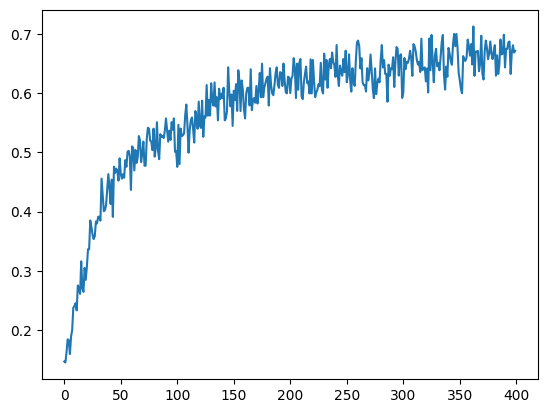

In [17]:
# Plot Results
# Plot Loss
import matplotlib.pyplot as plt
plt.plot(val_accuracies)

In [ ]:
val_accuracies = []
for X, y in test_dataloader:
    X = X.to(device)
    y = y.to(device)
    y_pred = model(X)
    val_accuracy = calculate_accuracy(y_pred, y)
    val_accuracies.append(val_accuracy)
print("Mean Validation Accuracy: ", np.mean(val_accuracies))

In [13]:
# GRU Data
# Create a Dataloader for GRU by chunking the data
# Output: An average risk
class AvalancheGRUDataset(Dataset):
    def __init__(self, df, chunk_size=16, chunks=100, train=True):
        self.df = df
        self.train = train
        self.input_columns = input_columns
        self.target_columns = target_columns
        self.chunk_size = chunk_size
        self.chunks = chunks
        
        # Make X and y (np arrays)
        X = df[self.input_columns].values.astype(np.float32)
        y = df[self.target_columns].values.astype(np.float32)
        
        # Mean for each row / Hot encode
        avalanche_risk = np.mean(y, axis=1).round().astype(int)
        y = np.zeros((len(avalanche_risk), 6))
        y[np.arange(len(avalanche_risk)), avalanche_risk] = 1
        X = torch.from_numpy(X)
        y = torch.from_numpy(y)
        
        # Split
        train_ratio = 0.8
        train_size = int(len(X) * train_ratio)
        self.X_train = X[:train_size]
        self.y_train = y[:train_size]
        self.X_test = X[train_size:]
        self.y_test = y[train_size:]
        
        
    def __len__(self):
        return self.chunks
        
        
    def __getitem__(self, idx):
        if self.train:
            random_idx = np.random.randint(0, len(self.X_train) - self.chunk_size)
            return self.X_train[random_idx:random_idx+self.chunk_size], self.y_train[random_idx:random_idx+self.chunk_size]
        else:
            random_idx = np.random.randint(0, len(self.X_test) - self.chunk_size)
            return self.X_test[random_idx:random_idx+self.chunk_size], self.y_test[random_idx:random_idx+self.chunk_size]

In [14]:
# GRU Model
class AvalancheGRU(nn.Module):
    def __init__(self, input_size, output_size, hidden_size=128, hidden_layers=2):
        super(AvalancheGRU, self).__init__()
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.hidden_layers = hidden_layers
        
        # self.linear1 = nn.Linear(input_size, hidden_size)
        # self.relu1 = nn.ReLU()
        self.gru = nn.GRU(input_size, hidden_size, hidden_layers, batch_first=True, dropout=0.2)
        self.relu2 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=0)
        
        
    def forward(self, x, hidden):
        """
        x: (batch_size, seq_len, input_size)
        returns: (batch_size, output_size)
        """
        # x = self.linear1(x)
        # x = self.relu1(x)
        x, hidden = self.gru(x, hidden)
        x = self.relu2(x[:, -1])
        x = self.linear2(x)
        x = self.softmax(x)
        
        return x, hidden
    
    def init_hidden(self):
        return torch.zeros(self.hidden_layers, self.hidden_size)

In [51]:
# Initialize Variables
batch_size = 1
train_dataset = AvalancheGRUDataset(df, chunks=80, chunk_size=8, train=True)
test_dataset = AvalancheGRUDataset(df, chunks=20, chunk_size=8, train=False)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)
model = AvalancheGRU(len(input_columns), 6, hidden_size=8, hidden_layers=2)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [52]:
# Train Model
import gc
def train(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs=1):
    total_step = len(train_dataloader)

    losses = []
    accuracies = []
    val_losses = []
    val_accuracies = []
    # with tqdm(range(num_epochs), desc="Epochs", total=num_epochs, leave=True, position=0, unit='epoch') as iterator:
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}")
        with tqdm(enumerate(train_dataloader), desc="Batches", total=len(train_dataloader), leave=True, position=0, unit='batch') as iterator:
            for i, (X, y) in iterator: # this is just the number of chunks
                # if i % 10 == 0:
                #     print(f"Batch {i}")
                X = X.to(device).squeeze(0)
                y = y.to(device).squeeze(0)
                # print('X shape', X.shape)
                # print('y shape', y.shape)
                # break
                
                # Full Forward Pass
                # print("Starting Forward Pass")
                hidden = model.init_hidden().to(device)
                optimizer.zero_grad()
                y_pred, hidden = model(X, hidden)
                # print('y_pred: ', y_pred.shape)
                # print('y: ', y[-1].shape)
                # break
                loss = criterion(y_pred, y[-1])
                
                    
                # Back Pass
                # print("Starting Backward Pass")
                loss.backward()
                optimizer.step()
                gc.collect()
                
                losses.append(loss.item())
                # print(y_pred.shape)
                # print(y[-1].shape)
                pred = torch.argmax(y_pred)
                real = torch.argmax(y[-1])
                accuracy = (pred == real).sum().item() # 0 or 1
                accuracies.append(accuracy)

                
                # accuracies.append(accuracy)
                iterator.set_postfix_str(f"Loss: {loss.item():.4f}")
                
                # Validation
                if i % 10 == 0:
                    tmp_val_accuracies = []
                    tmp_val_losses = []
                    for X, y in test_dataloader:
                        X = X.to(device).squeeze(0)
                        y = y.to(device).squeeze(0)
                        hidden = model.init_hidden().to(device)
                        y_pred, hidden = model(X, hidden)
                        val_loss = criterion(y_pred, y[-1])
                        tmp_val_losses.append(val_loss.item())
                        # val_accuracy = calculate_accuracy(y_pred, y[-1])
                        # tmp_val_accuracies.append(val_accuracy)
                        pred = torch.argmax(y_pred)
                        real = torch.argmax(y[-1])
                        accuracy = (pred == real).sum().item() # 0 or 1
                        tmp_val_accuracies.append(accuracy)
                    val_losses.append(np.mean(tmp_val_losses))
                    val_accuracies.append(np.mean(tmp_val_accuracies))
                
                
                # if i % 10 == 0 and i != 0: 
                #     tmp_val_losses = []
                #     tmp_val_accuracies = []
                #     # print(len(test_dataloader))
                #     with tqdm(enumerate(test_dataloader), desc="Val Batches", total=len(test_dataloader), leave=True, position=1, unit='batch') as test_iter:
                #         for j, (X, y) in test_iter:
                #             # print(i)
                #             X = X.to(device)
                #             y = y.to(device)
                #             hidden = model.init_hidden().to(device)
                #             val_loss = 0
                #             y_pred, hidden = None, None
                #             for j in range(X.shape[0]):
                #                 y_pred, hidden = model(X[j].unsqueeze(0), hidden)
                #                 val_loss += criterion(y_pred, y[j].unsqueeze(0))
                #             tmp_val_losses.append(val_loss.item())
                #             val_accuracy = calculate_accuracy(y_pred, y[-1].unsqueeze(0))
                #             tmp_val_accuracies.append(val_accuracy)
                #             test_iter.set_postfix_str(f"Val Loss: {np.mean(tmp_val_losses):.4f}")
                #     val_losses.append(np.mean(tmp_val_losses))
                #     val_accuracies.append(np.mean(tmp_val_accuracies))
                #     iterator.set_description_str(f"Val Loss: {np.mean(val_losses):.4f}")   
                #     gc.collect()
    return losses, accuracies, val_losses, val_accuracies   

In [53]:
losses, accuracies, val_losses, val_accuracies = train(model, train_dataloader, test_dataloader, criterion, optimizer, num_epochs=20)

Epoch 1


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.63batch/s, Loss: 1.7682]


Epoch 2


Batches: 100%|██████████| 80/80 [00:13<00:00,  5.75batch/s, Loss: 1.7749]


Epoch 3


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.67batch/s, Loss: 1.6216]


Epoch 4


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.50batch/s, Loss: 1.8680]


Epoch 5


Batches: 100%|██████████| 80/80 [00:13<00:00,  5.84batch/s, Loss: 1.4848]


Epoch 6


Batches: 100%|██████████| 80/80 [00:13<00:00,  5.72batch/s, Loss: 1.6553]


Epoch 7


Batches: 100%|██████████| 80/80 [00:13<00:00,  5.81batch/s, Loss: 1.3356]


Epoch 8


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.61batch/s, Loss: 1.3185]


Epoch 9


Batches: 100%|██████████| 80/80 [00:13<00:00,  5.77batch/s, Loss: 1.2611]


Epoch 10


Batches: 100%|██████████| 80/80 [00:13<00:00,  5.76batch/s, Loss: 1.7611]


Epoch 11


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.71batch/s, Loss: 1.9645]


Epoch 12


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.62batch/s, Loss: 1.2652]


Epoch 13


Batches: 100%|██████████| 80/80 [00:16<00:00,  4.97batch/s, Loss: 1.7894]


Epoch 14


Batches: 100%|██████████| 80/80 [00:16<00:00,  4.99batch/s, Loss: 1.9842]


Epoch 15


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.44batch/s, Loss: 1.1795]


Epoch 16


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.71batch/s, Loss: 1.8802]


Epoch 17


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.64batch/s, Loss: 1.1668]


Epoch 18


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.65batch/s, Loss: 1.1505]


Epoch 19


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.57batch/s, Loss: 2.0174]


Epoch 20


Batches: 100%|██████████| 80/80 [00:14<00:00,  5.34batch/s, Loss: 1.9094]


In [19]:
import matplotlib.pyplot as plt

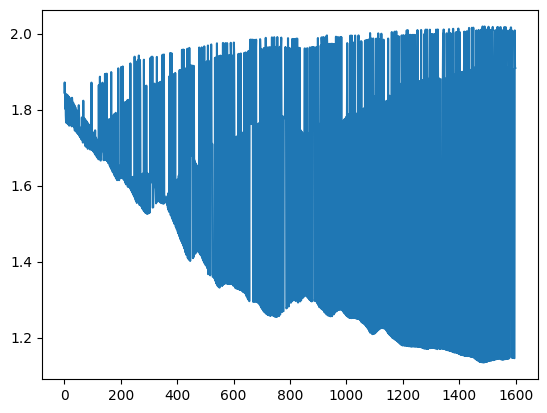

In [54]:
plt.plot(losses)

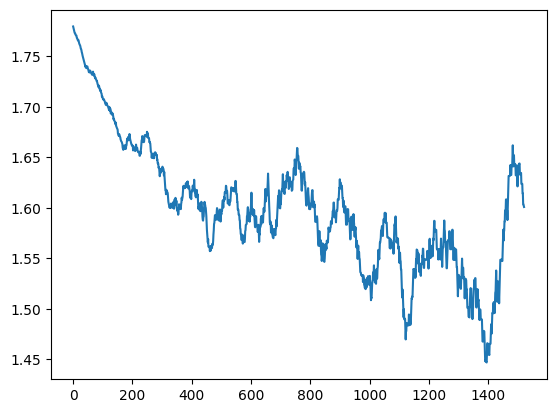

In [55]:
# Plot a moving average losses
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
plt.plot(moving_average(losses, 80))

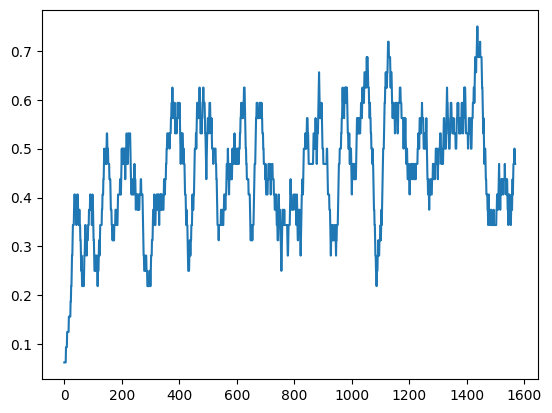

In [56]:
# Accuracies are either 0 or 1, so lets create a moving average with window 20
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

plt.plot(moving_average(accuracies, 32))

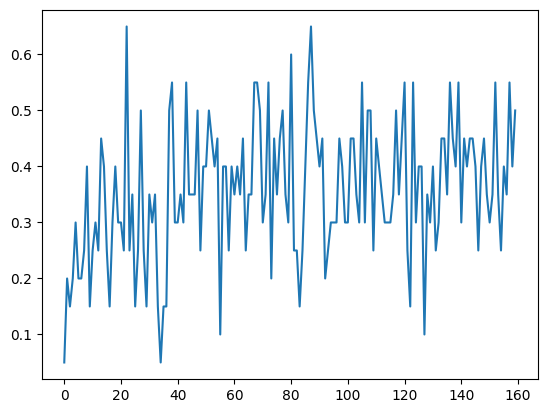

In [57]:
# Plot Results
# Plot Loss
plt.plot(val_accuracies)

In [58]:
# Max Val Accuracy and Index
print(np.max(val_accuracies))
print(np.argmax(val_accuracies))

0.65
22


In [50]:
# Max Val Accuracy and Index
print(np.max(val_accuracies))
print(np.argmax(val_accuracies))


0.55
86


In [21]:
# pip install xgboost
!pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.0/99.8 MB 281.8 kB/s eta 0:05:54
   ---------------------------------------- 0.1/99.8 MB 722.1 kB/s eta 0:02:18
   ---------------------------------------- 0.4/99.8 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 0.8/99.8 MB 3.3 MB/s eta 0:00:31
    --------------------------------------- 1.7/99.8 MB 5.6 MB/s eta 0:00:18
   - -------------------------------------- 2.5/99.8 MB 7.7 MB/s eta 0:00:13
   - -------------------------------------- 3.6/99.8 MB 9.5 MB/s eta 0:00:11
   -- ------------------------------------- 5.6/99.8 MB 13.3 MB/s eta 0:00:08
   -- ------------------------------------- 7.2/99.8 MB 15.2 MB/s eta 0:00:07
   --- -----

In [25]:
# XGBoost

# Data
X = df[input_columns]
y = df[target_columns]
y = np.mean(y, axis=1).round().astype(int)

# Split


0    2
1    2
2    2
3    2
4    1
dtype: int32

In [ ]:
# Using XGBoost
model = XGBRegressor()
